<a href="https://colab.research.google.com/github/SairamS28/SairamS28/blob/main/Yulu_Case_Study_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.



# How you can help here?

- The company wants to know:

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands

Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Dataset

In [ ]:
Yulu_df=pd.read_csv("/content/Yulu.csv")

In [ ]:
Yulu_df.shape

(10886, 12)

In [ ]:
Yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
Yulu_df.info()#holiday and stuff is int? so covert to categorical and datetime is obj

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
Yulu_df["datetime"]=pd.to_datetime(Yulu_df["datetime"])

In [ ]:
for col in ["season","holiday","workingday","weather"]:
  Yulu_df[col]=Yulu_df[col].astype(object)

In [ ]:
Yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
Yulu_df.describe(include="all")

<ipython-input-41-eb836634080f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Yulu_df.describe(include="all")


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


In [ ]:
Yulu_df["season"]=Yulu_df["season"].replace([1,2,3,4],["Spring","Summer","Fall","Winter"])

<Axes: >

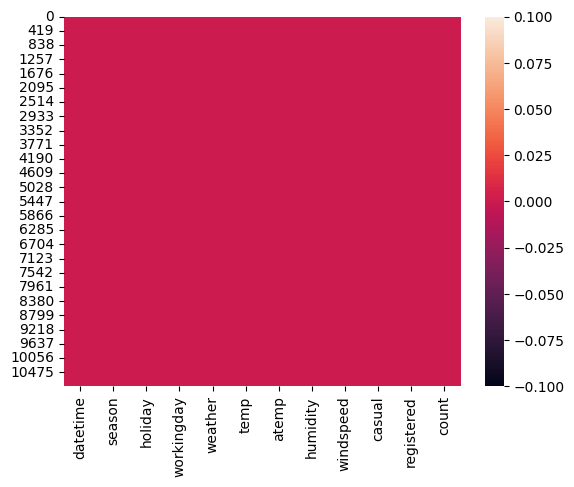

In [ ]:
sns.heatmap(Yulu_df.isna()) # No Nulls :)

In [ ]:
Yulu_df["holiday"].value_counts()


0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
Yulu_df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
Yulu_df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
Yulu_df["season"].value_counts()

Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: season, dtype: int64

<ipython-input-48-2e5dffa8f8cd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Yulu_df.corr(),annot=True)


<Axes: >

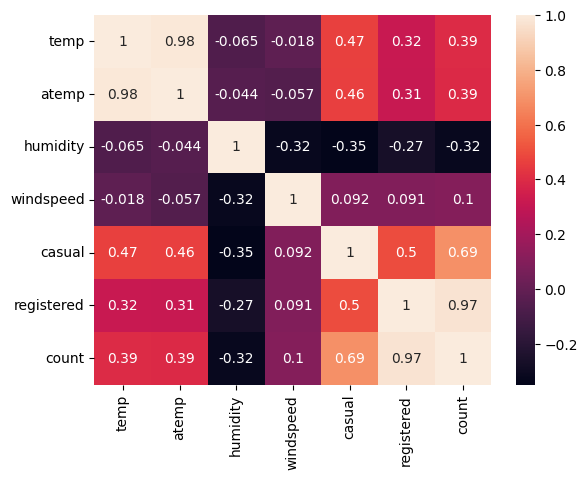

In [ ]:
sns.heatmap(Yulu_df.corr(),annot=True)

In [ ]:
Holiday=Yulu_df.loc[Yulu_df["holiday"]==1]
Holiday.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
372,2011-01-17 00:00:00,Spring,1,0,2,8.20,9.850,47,15.0013,1,16,17
373,2011-01-17 01:00:00,Spring,1,0,2,8.20,9.850,44,12.9980,1,15,16
374,2011-01-17 02:00:00,Spring,1,0,2,7.38,8.335,43,16.9979,0,8,8
375,2011-01-17 03:00:00,Spring,1,0,2,7.38,9.090,43,12.9980,0,2,2
376,2011-01-17 04:00:00,Spring,1,0,2,7.38,9.850,43,8.9981,1,2,3


In [ ]:
Working_day=Yulu_df.loc[Yulu_df["workingday"]==1]
Working_day.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
47,2011-01-03 00:00:00,Spring,0,1,1,9.02,9.850,44,23.9994,0,5,5
48,2011-01-03 01:00:00,Spring,0,1,1,8.20,8.335,44,27.9993,0,2,2
49,2011-01-03 04:00:00,Spring,0,1,1,6.56,6.820,47,26.0027,0,1,1
50,2011-01-03 05:00:00,Spring,0,1,1,6.56,6.820,47,19.0012,0,3,3
51,2011-01-03 06:00:00,Spring,0,1,1,5.74,5.305,50,26.0027,0,30,30


In [ ]:
data1=pd.crosstab([Yulu_df["workingday"]],[Yulu_df["count"]],rownames=["Working Days"],colnames=["Count"])
data1

Count,1,2,3,4,5,6,7,8,9,10,...,897,900,901,917,925,943,948,968,970,977
Working Days,,,,,,,,,,,,,,,,,,,,,
0,21,25,27,27,35,35,28,29,27,33,...,0,0,0,0,0,0,0,0,0,0
1,84,107,117,122,134,100,90,70,56,62,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
data2=pd.crosstab([Yulu_df["holiday"]],[Yulu_df["count"]],rownames=["Holiday"],colnames=["Count"])
data2

Count,1,2,3,4,5,6,7,8,9,10,...,897,900,901,917,925,943,948,968,970,977
Holiday,,,,,,,,,,,,,,,,,,,,,
0,104,131,140,142,168,130,116,94,83,94,...,1,1,1,1,1,1,1,1,1,1
1,1,1,4,7,1,5,2,5,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data3=pd.crosstab([Yulu_df["weather"]],Yulu_df["season"])
data3

season,Fall,Spring,Summer,Winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225
4,0,1,0,0


In [ ]:
x=Yulu_df["count"]
y=Yulu_df["workingday"]
correlation_coefficient, p_value = stats.pearsonr(x, y)
print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

    # Write condition for correlation coefficient against alpha
if p_value < 0.05:
  print("Reject the null hypothesis that the two distributions are uncorrelated.")
else:
  print("Fail to reject the null hypothesis that the two distributions are uncorrelated.")

Pearson correlation coefficient: 0.011593866091574393
p-value: 0.2264480422636105
Fail to reject the null hypothesis that the two distributions are uncorrelated.


In [ ]:
x=Yulu_df["count"]
y=Yulu_df["weather"]
correlation_coefficient, p_value = stats.pearsonr(x, y)
print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

    # Write condition for correlation coefficient against alpha
if p_value < 0.05:
  print("Reject the null hypothesis that the two distributions are uncorrelated.")
else:
  print("Fail to reject the null hypothesis that the two distributions are uncorrelated.")

Pearson correlation coefficient: -0.12865520103850636
p-value: 2.11110596732317e-41
Reject the null hypothesis that the two distributions are uncorrelated.


In [ ]:
x=Yulu_df["count"]
y=Yulu_df["holiday"]
correlation_coefficient, p_value = stats.pearsonr(x, y)
print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

    # Write condition for correlation coefficient against alpha
if p_value < 0.05:
  print("Reject the null hypothesis that the two distributions are uncorrelated.")
else:
  print("Fail to reject the null hypothesis that the two distributions are uncorrelated.")

Pearson correlation coefficient: -0.0053929844777743825
p-value: 0.5736923883271038
Fail to reject the null hypothesis that the two distributions are uncorrelated.


So to test signficance we need to anova for which we need to check equal varience in the categorical data and normal distribution then use anova

In [ ]:
def shapiro_test(x):
    sns.histplot(x,kde=True)
    plt.show()

    # Calculate Shapiro-Wilk test
    shapiro_test_statistic, p_value = stats.shapiro(x)
    print("Shapiro-Wilk test statistic:", shapiro_test_statistic)
    print("p-value:", p_value)

    # Write condition for p-value against alpha
    if p_value < 0.05:
        print("Reject the null hypothesis that the data is normally distributed.")
    else:
        print("Fail to reject the null hypothesis that the data is normally distributed.")


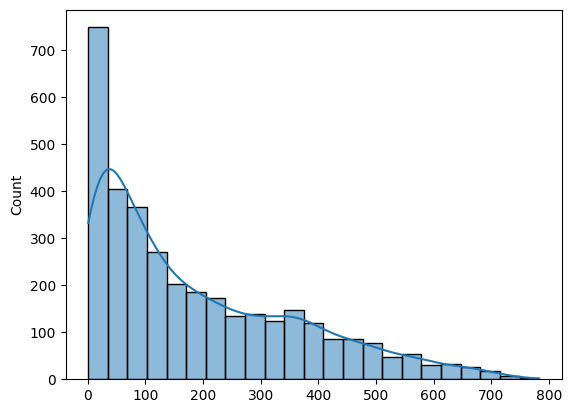

Shapiro-Wilk test statistic: 0.8852126598358154
p-value: 4.203895392974451e-45
Reject the null hypothesis that the data is normally distributed.


In [ ]:
a1=Yulu_df[Yulu_df['workingday']==0]['count'].values
shapiro_test(a1)

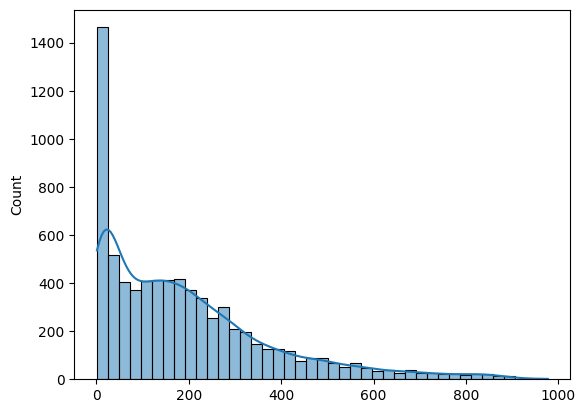

Shapiro-Wilk test statistic: 0.8702582120895386
p-value: 0.0
Reject the null hypothesis that the data is normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
a2=Yulu_df[Yulu_df['workingday']==1]['count'].values
shapiro_test(a2)

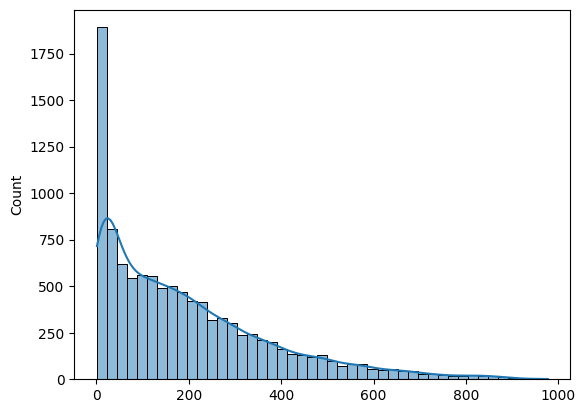

Shapiro-Wilk test statistic: 0.8775045871734619
p-value: 0.0
Reject the null hypothesis that the data is normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
a3=Yulu_df[Yulu_df['holiday']==0]['count'].values
shapiro_test(a3)

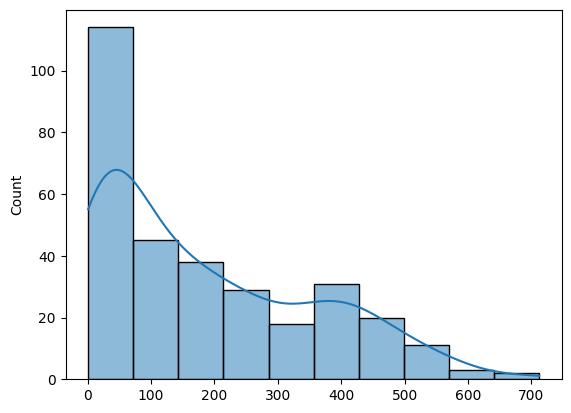

Shapiro-Wilk test statistic: 0.8933213353157043
p-value: 5.859704133590396e-14
Reject the null hypothesis that the data is normally distributed.


In [ ]:
a4=Yulu_df[Yulu_df['holiday']==1]['count'].values
shapiro_test(a4)

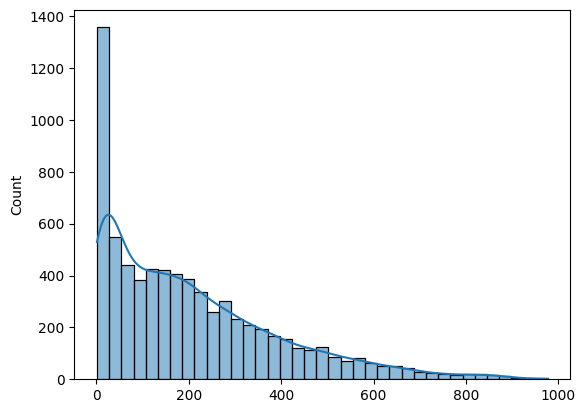

Shapiro-Wilk test statistic: 0.8909230828285217
p-value: 0.0
Reject the null hypothesis that the data is normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
b1=Yulu_df[Yulu_df['weather']==1]['count'].values
shapiro_test(b1)

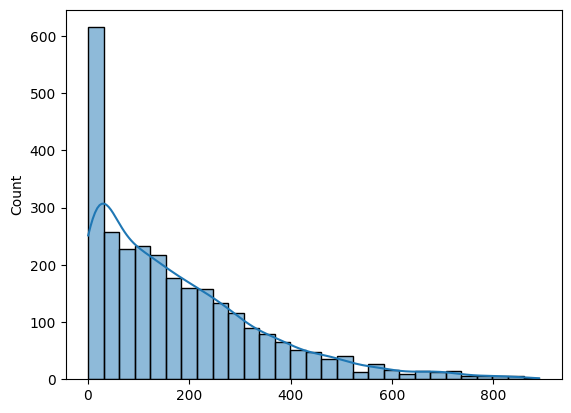

Shapiro-Wilk test statistic: 0.8767687082290649
p-value: 9.781063280987223e-43
Reject the null hypothesis that the data is normally distributed.


In [ ]:
b2=Yulu_df[Yulu_df['weather']==2]['count'].values
shapiro_test(b2)

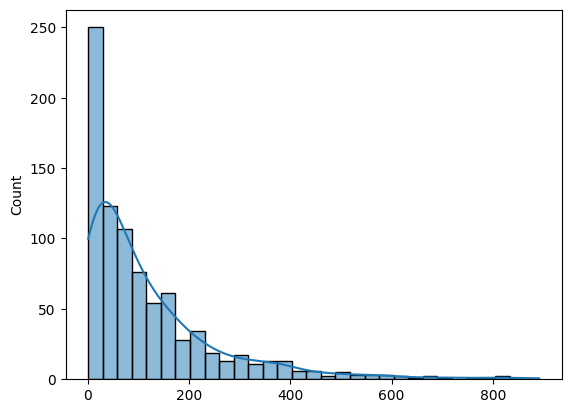

Shapiro-Wilk test statistic: 0.7674332857131958
p-value: 3.876090133422781e-33
Reject the null hypothesis that the data is normally distributed.


In [ ]:
b3=Yulu_df[Yulu_df['weather']==3]['count'].values
shapiro_test(b3)

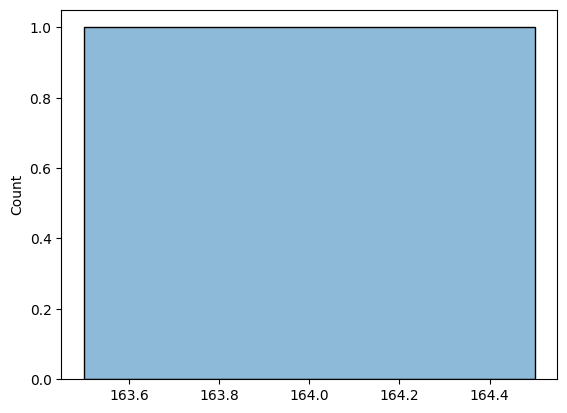

ValueError: ignored

In [ ]:
b4=Yulu_df[Yulu_df['weather']==4]['count'].values
shapiro_test(b4)# it seems Weather=4 has only 1 value of 164

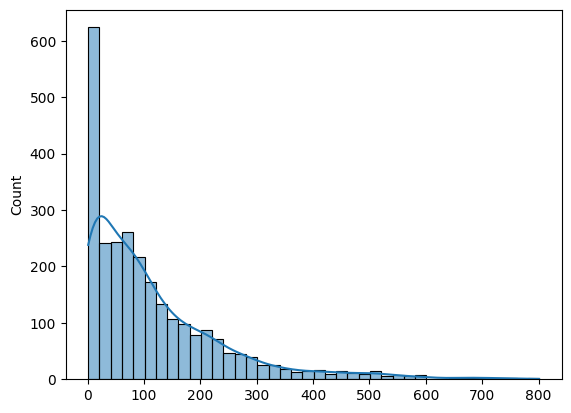

Shapiro-Wilk test statistic: 0.8087388873100281
p-value: 0.0
Reject the null hypothesis that the data is normally distributed.


In [ ]:
b5=Yulu_df[Yulu_df['season']=="Spring"]['count'].values
shapiro_test(b5)

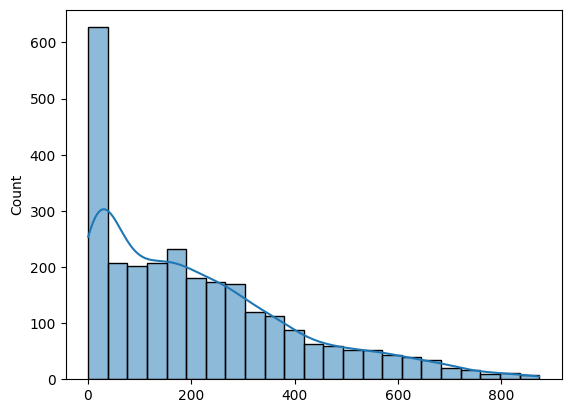

Shapiro-Wilk test statistic: 0.900481641292572
p-value: 6.039093315091269e-39
Reject the null hypothesis that the data is normally distributed.


In [ ]:
b6=Yulu_df[Yulu_df['season']=="Summer"]['count'].values
shapiro_test(b6)

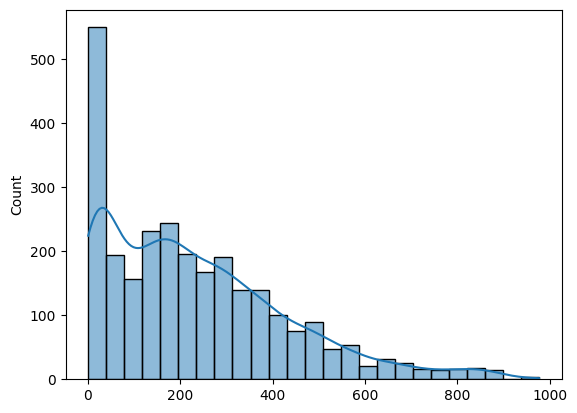

Shapiro-Wilk test statistic: 0.9148160815238953
p-value: 1.043458045587339e-36
Reject the null hypothesis that the data is normally distributed.


In [ ]:
b7=Yulu_df[Yulu_df['season']=="Fall"]['count'].values
shapiro_test(b7)

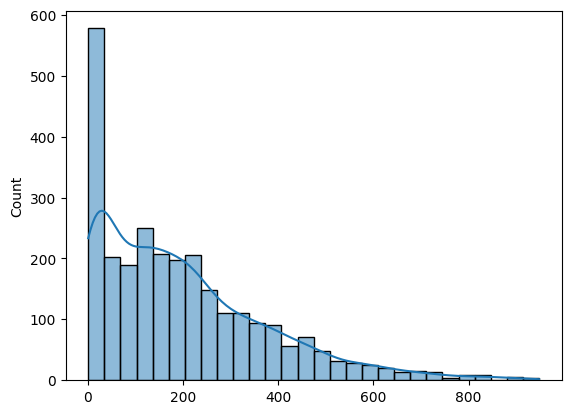

Shapiro-Wilk test statistic: 0.8954644799232483
p-value: 1.1301682309549298e-39
Reject the null hypothesis that the data is normally distributed.


In [ ]:
b8=Yulu_df[Yulu_df['season']=="Winter"]['count'].values
shapiro_test(b8)

It seems data is not distributed so cannot do ANOVA on any of the categorical they are very skewed towards left. So we do kruskal

In [ ]:
#Null Hypothesis: Variances is similar in different holiday and working day.

#Alternate Hypothesis: Variances is not similar in different  holiday and working day.

#assumptions of ANOVA don't hold
kruskal_stat, p_value = stats.kruskal(a1,a2,a3,a4)
print("p_value===",p_value)
if p_value<0.05:
  print("Since p-value is less than 0.05, we reject the null hypothesis")
else:
  print("Since p-value is more than 0.05, we cannot reject the null hypothesis")

p_value=== 0.9985835104114964
Since p-value is more than 0.05, we cannot reject the null hypothesis


In [ ]:
from math import e
#Null Hypothesis: Variances is similar in different holiday and working day.

#Alternate Hypothesis: Variances is not similar in different  holiday and working day.

#assumptions of ANOVA don't hold
kruskal_stat, p_value = stats.kruskal(b1,b2,b3,b4,b5,b6,b7,b8)
print("p_value===",p_value)
if p_value<0.05:
  print("Since p-value is less than 0.05, we reject the null hypothesis")
else:
  print("Since p-value is more than 0.05, we cannot reject the null hypothesis")

p_value=== 4.614440933900297e-191
Since p-value is less than 0.05, we reject the null hypothesis
